# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Yeftha Joshua Ezekiel
- **Email:** jefthajoshua9@gmail.com
- **ID Dicoding:** yefthajoshua

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca (misalnya, suhu, kelembaban, curah hujan) berkorelasi dengan tingkat polutan pada distik shunyi dan guanyan?
- Apakah kecepatan angin dapat mengurangi tingkat polutan pada distik shunyi dan guanyan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
!git clone https://github.com/ArkZ10/Air-Quality-Dataset.git

Cloning into 'Air-Quality-Dataset'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 0), reused 18 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 8.37 MiB | 5.92 MiB/s, done.


## Data Wrangling

### Gathering Data

In [3]:
shunyi_df = pd.read_csv("/content/Air-Quality-Dataset/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv", delimiter=",")
guanyan_df = pd.read_csv("/content/Air-Quality-Dataset/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv", delimiter=",")

In [4]:
shunyi_df = shunyi_df[['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'TEMP', 'DEWP', 'WSPM']]
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,TEMP,DEWP,WSPM
0,1,2013,3,1,0,3.0,6.0,-0.9,-20.5,9.3
1,2,2013,3,1,1,12.0,12.0,-1.1,-21.3,9.4
2,3,2013,3,1,2,14.0,14.0,-1.7,-23.0,8.6
3,4,2013,3,1,3,12.0,12.0,-2.1,-23.3,6.6
4,5,2013,3,1,4,12.0,12.0,-2.4,-22.9,4.5


In [5]:
guanyan_df = guanyan_df[['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'TEMP', 'DEWP', 'WSPM']]
guanyan_df.head()

,No,year,month,day,hour,PM2.5,PM10,TEMP,DEWP,WSPM
0,1,2013,3,1,0,4.0,4.0,-0.7,-18.8,4.4
1,2,2013,3,1,1,4.0,4.0,-1.1,-18.2,4.7
2,3,2013,3,1,2,3.0,3.0,-1.1,-18.2,5.6
3,4,2013,3,1,3,3.0,6.0,-1.4,-19.4,3.1
4,5,2013,3,1,4,3.0,6.0,-2.0,-19.5,2.0


In [6]:
merged_df = pd.merge(
    shunyi_df,
    guanyan_df,
    on=['No', 'year', 'month', 'day', 'hour'],
    suffixes=('_shunyi', '_guanyan')
)
merged_df.head()

,No,year,month,day,hour,PM2.5_shunyi,PM10_shunyi,TEMP_shunyi,DEWP_shunyi,WSPM_shunyi,PM2.5_guanyan,PM10_guanyan,TEMP_guanyan,DEWP_guanyan,WSPM_guanyan
0,1,2013,3,1,0,3.0,6.0,-0.9,-20.5,9.3,4.0,4.0,-0.7,-18.8,4.4
1,2,2013,3,1,1,12.0,12.0,-1.1,-21.3,9.4,4.0,4.0,-1.1,-18.2,4.7
2,3,2013,3,1,2,14.0,14.0,-1.7,-23.0,8.6,3.0,3.0,-1.1,-18.2,5.6
3,4,2013,3,1,3,12.0,12.0,-2.1,-23.3,6.6,3.0,6.0,-1.4,-19.4,3.1
4,5,2013,3,1,4,12.0,12.0,-2.4,-22.9,4.5,3.0,6.0,-2.0,-19.5,2.0


Pada tahap ini, data kualitas udara dikumpulkan untuk Distrik Shunyi dan Distrik Guanyuan di kota Beijing. Data ini berasal dari dataset PRSA, yang berisi pengukuran kualitas udara dari beberapa lokasi di Beijing dalam kurun waktu tertentu. Menyesuaikan dengan pertanyaan bisnis yang ada, beberapa column tidak diperlukan/dihilangkan

### Assessing Data

In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             35064 non-null  int64  
 1   year           35064 non-null  int64  
 2   month          35064 non-null  int64  
 3   day            35064 non-null  int64  
 4   hour           35064 non-null  int64  
 5   PM2.5_shunyi   34151 non-null  float64
 6   PM10_shunyi    34516 non-null  float64
 7   TEMP_shunyi    35013 non-null  float64
 8   DEWP_shunyi    35010 non-null  float64
 9   WSPM_shunyi    35020 non-null  float64
 10  PM2.5_guanyan  34448 non-null  float64
 11  PM10_guanyan   34635 non-null  float64
 12  TEMP_guanyan   35044 non-null  float64
 13  DEWP_guanyan   35044 non-null  float64
 14  WSPM_guanyan   35050 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 4.0 MB


In [8]:
merged_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5_shunyi,913
PM10_shunyi,548
TEMP_shunyi,51
DEWP_shunyi,54
WSPM_shunyi,44


In [9]:
merged_df.describe()

,No,year,month,day,hour,PM2.5_shunyi,PM10_shunyi,TEMP_shunyi,DEWP_shunyi,WSPM_shunyi,PM2.5_guanyan,PM10_guanyan,TEMP_guanyan,DEWP_guanyan,WSPM_guanyan
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,35013.000000,35010.000000,35020.000000,34448.000000,34635.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.387969,2.465036,1.807533,82.933372,109.023303,13.584607,3.123062,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,11.483588,13.726622,1.287817,80.933497,91.573709,11.399097,13.688896,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,-16.800000,-36.000000,0.000000,2.000000,2.000000,-16.800000,-35.300000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,3.000000,-8.800000,1.000000,23.000000,40.000000,3.100000,-8.100000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,14.400000,3.100000,1.500000,59.000000,89.000000,14.500000,3.800000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,23.200000,15.100000,2.300000,115.000000,149.000000,23.300000,15.600000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,40.600000,27.500000,12.800000,680.000000,999.000000,40.500000,28.500000,11.200000


Berdasarkan hasil analisis awal pada merged_df, ditemukan adanya beberapa kolom yang memiliki missing values sesuai dengan output dari merged_df.info() dan isnull().sum(). Namun, berdasarkan hasil merged_df.describe(), tidak ditemukan adanya anomali atau kejanggalan dalam nilai statistik deskriptif seperti rata-rata, median, nilai minimum, dan maksimum. Selain itu, perbandingan nilai statistik antara distrik Shunyi dan Guanyan juga menunjukkan distribusi yang serupa, tanpa perbedaan yang signifikan.

### Cleaning Data

In [10]:
columns_with_missing_values = ['PM2.5_shunyi', 'PM10_shunyi', 'TEMP_shunyi', 'DEWP_shunyi', 'WSPM_shunyi',
                               'PM2.5_guanyan', 'PM10_guanyan', 'TEMP_guanyan', 'DEWP_guanyan', 'WSPM_guanyan']

for column in columns_with_missing_values:
    merged_df[column].fillna(merged_df[column].mean(), inplace=True)


<ipython-input-10-da4122afa126>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[column].fillna(merged_df[column].mean(), inplace=True)


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             35064 non-null  int64  
 1   year           35064 non-null  int64  
 2   month          35064 non-null  int64  
 3   day            35064 non-null  int64  
 4   hour           35064 non-null  int64  
 5   PM2.5_shunyi   35064 non-null  float64
 6   PM10_shunyi    35064 non-null  float64
 7   TEMP_shunyi    35064 non-null  float64
 8   DEWP_shunyi    35064 non-null  float64
 9   WSPM_shunyi    35064 non-null  float64
 10  PM2.5_guanyan  35064 non-null  float64
 11  PM10_guanyan   35064 non-null  float64
 12  TEMP_guanyan   35064 non-null  float64
 13  DEWP_guanyan   35064 non-null  float64
 14  WSPM_guanyan   35064 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 4.0 MB


In [12]:
merged_df['datetime'] = pd.to_datetime(merged_df[['year', 'month', 'day', 'hour']])
merged_df.set_index('datetime', inplace=True)
merged_df.head()

,No,year,month,day,hour,PM2.5_shunyi,PM10_shunyi,TEMP_shunyi,DEWP_shunyi,WSPM_shunyi,PM2.5_guanyan,PM10_guanyan,TEMP_guanyan,DEWP_guanyan,WSPM_guanyan
datetime,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,-0.9,-20.5,9.3,4.0,4.0,-0.7,-18.8,4.4
2013-03-01 01:00:00,2,2013,3,1,1,12.0,12.0,-1.1,-21.3,9.4,4.0,4.0,-1.1,-18.2,4.7
2013-03-01 02:00:00,3,2013,3,1,2,14.0,14.0,-1.7,-23.0,8.6,3.0,3.0,-1.1,-18.2,5.6
2013-03-01 03:00:00,4,2013,3,1,3,12.0,12.0,-2.1,-23.3,6.6,3.0,6.0,-1.4,-19.4,3.1
2013-03-01 04:00:00,5,2013,3,1,4,12.0,12.0,-2.4,-22.9,4.5,3.0,6.0,-2.0,-19.5,2.0


Dataset merged_df telah diolah dengan mengonversi kolom year, month, day, dan hour menjadi satu kolom datetime menggunakan fungsi pd.to_datetime(), sehingga data dapat dianalisis sebagai time series yang terstruktur berdasarkan waktu. Selain itu, untuk menangani missing values yang ditemukan pada beberapa kolom, nilai yang kosong diisi dengan rata-rata kolom masing-masing. Langkah ini dipilih agar data tetap lengkap tanpa harus menghapus baris yang mengandung kekosongan, menjaga kontinuitas dan keakuratan data dalam analisis time series.

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
correlation_matrix_1_shunyi = merged_df[['TEMP_shunyi', 'DEWP_shunyi', 'PM2.5_shunyi', 'PM10_shunyi']].corr()
correlation_matrix_1_guanyan = merged_df[['TEMP_guanyan', 'DEWP_guanyan', 'PM2.5_guanyan', 'PM10_guanyan']].corr()

In [14]:
correlation_matrix_1_shunyi

,TEMP_shunyi,DEWP_shunyi,PM2.5_shunyi,PM10_shunyi
TEMP_shunyi,1.000000,0.823834,-0.114435,-0.083828
DEWP_shunyi,0.823834,1.000000,0.123126,0.088131
PM2.5_shunyi,-0.114435,0.123126,1.000000,0.894480
PM10_shunyi,-0.083828,0.088131,0.894480,1.000000


In [15]:
correlation_matrix_1_guanyan

,TEMP_guanyan,DEWP_guanyan,PM2.5_guanyan,PM10_guanyan
TEMP_guanyan,1.000000,0.823099,-0.126600,-0.090949
DEWP_guanyan,0.823099,1.000000,0.123748,0.083980
PM2.5_guanyan,-0.126600,0.123748,1.000000,0.884976
PM10_guanyan,-0.090949,0.083980,0.884976,1.000000


In [16]:
correlation_matrix_2_shunyi = merged_df[['WSPM_shunyi', 'PM2.5_shunyi', 'PM10_shunyi']].corr()
correlation_matrix_2_guanyan = merged_df[['WSPM_guanyan', 'PM2.5_guanyan', 'PM10_guanyan']].corr()

In [17]:
correlation_matrix_2_shunyi

,WSPM_shunyi,PM2.5_shunyi,PM10_shunyi
WSPM_shunyi,1.000000,-0.266601,-0.197856
PM2.5_shunyi,-0.266601,1.000000,0.894480
PM10_shunyi,-0.197856,0.894480,1.000000


In [18]:
correlation_matrix_2_guanyan

,WSPM_guanyan,PM2.5_guanyan,PM10_guanyan
WSPM_guanyan,1.000000,-0.281610,-0.188171
PM2.5_guanyan,-0.281610,1.000000,0.884976
PM10_guanyan,-0.188171,0.884976,1.000000


In [19]:
correlation_matrix_3_shunyi = merged_df[['WSPM_shunyi', 'TEMP_shunyi', 'DEWP_shunyi']].corr()
correlation_matrix_3_guanyan = merged_df[['WSPM_guanyan', 'TEMP_guanyan', 'DEWP_guanyan']].corr()

In [20]:
correlation_matrix_3_shunyi

,WSPM_shunyi,TEMP_shunyi,DEWP_shunyi
WSPM_shunyi,1.000000,0.063220,-0.256087
TEMP_shunyi,0.063220,1.000000,0.823834
DEWP_shunyi,-0.256087,0.823834,1.000000


In [21]:
correlation_matrix_3_guanyan

,WSPM_guanyan,TEMP_guanyan,DEWP_guanyan
WSPM_guanyan,1.000000,0.037907,-0.305011
TEMP_guanyan,0.037907,1.000000,0.823099
DEWP_guanyan,-0.305011,0.823099,1.000000


In [22]:
merged_df.describe(include="all")

,No,year,month,day,hour,PM2.5_shunyi,PM10_shunyi,TEMP_shunyi,DEWP_shunyi,WSPM_shunyi,PM2.5_guanyan,PM10_guanyan,TEMP_guanyan,DEWP_guanyan,WSPM_guanyan
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.387969,2.465036,1.807533,82.933372,109.023303,13.584607,3.123062,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.167173,88.444361,11.475233,13.716048,1.287009,80.219412,91.011777,11.395845,13.684991,1.203831
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,-16.800000,-36.000000,0.000000,2.000000,2.000000,-16.800000,-35.300000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,32.000000,3.000000,-8.800000,1.000000,24.000000,41.000000,3.100000,-8.100000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,79.000000,14.400000,3.000000,1.500000,61.000000,90.000000,14.500000,3.800000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,137.000000,23.200000,15.100000,2.300000,113.000000,148.000000,23.300000,15.600000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,40.600000,27.500000,12.800000,680.000000,999.000000,40.500000,28.500000,11.200000


Pada tahap eksplorasi data didapatkan beberapa insight:

1. PM2.5 dan PM10 memiliki korelasi yang sangat kuat (mendekati 0.89), menunjukkan bahwa kenaikan salah satu polutan biasanya diikuti oleh kenaikan polutan lainnya.

2. Suhu (TEMP) dan titik embun (DEWP) memiliki hubungan yang signifikan dengan korelasi di atas 0.82, yang mengindikasikan bahwa perubahan suhu biasanya disertai oleh perubahan titik embun.

3. Kecepatan angin memiliki korelasi negatif dengan polutan, yaitu sekitar -0.26 untuk PM2.5 dan -0.20 untuk PM10. Ini menunjukkan bahwa peningkatan kecepatan angin cenderung membantu mengurangi konsentrasi polutan di udara.

4. Distribusi rata-rata polutan dan variabel cuaca di kedua distrik (Shunyi dan Guanyan) mirip, tetapi ada perbedaan signifikan pada nilai maksimum PM10, yang bisa mengindikasikan kejadian polusi tinggi di salah satu distrik.

## Visualization & Explanatory Analysis

### Dataset

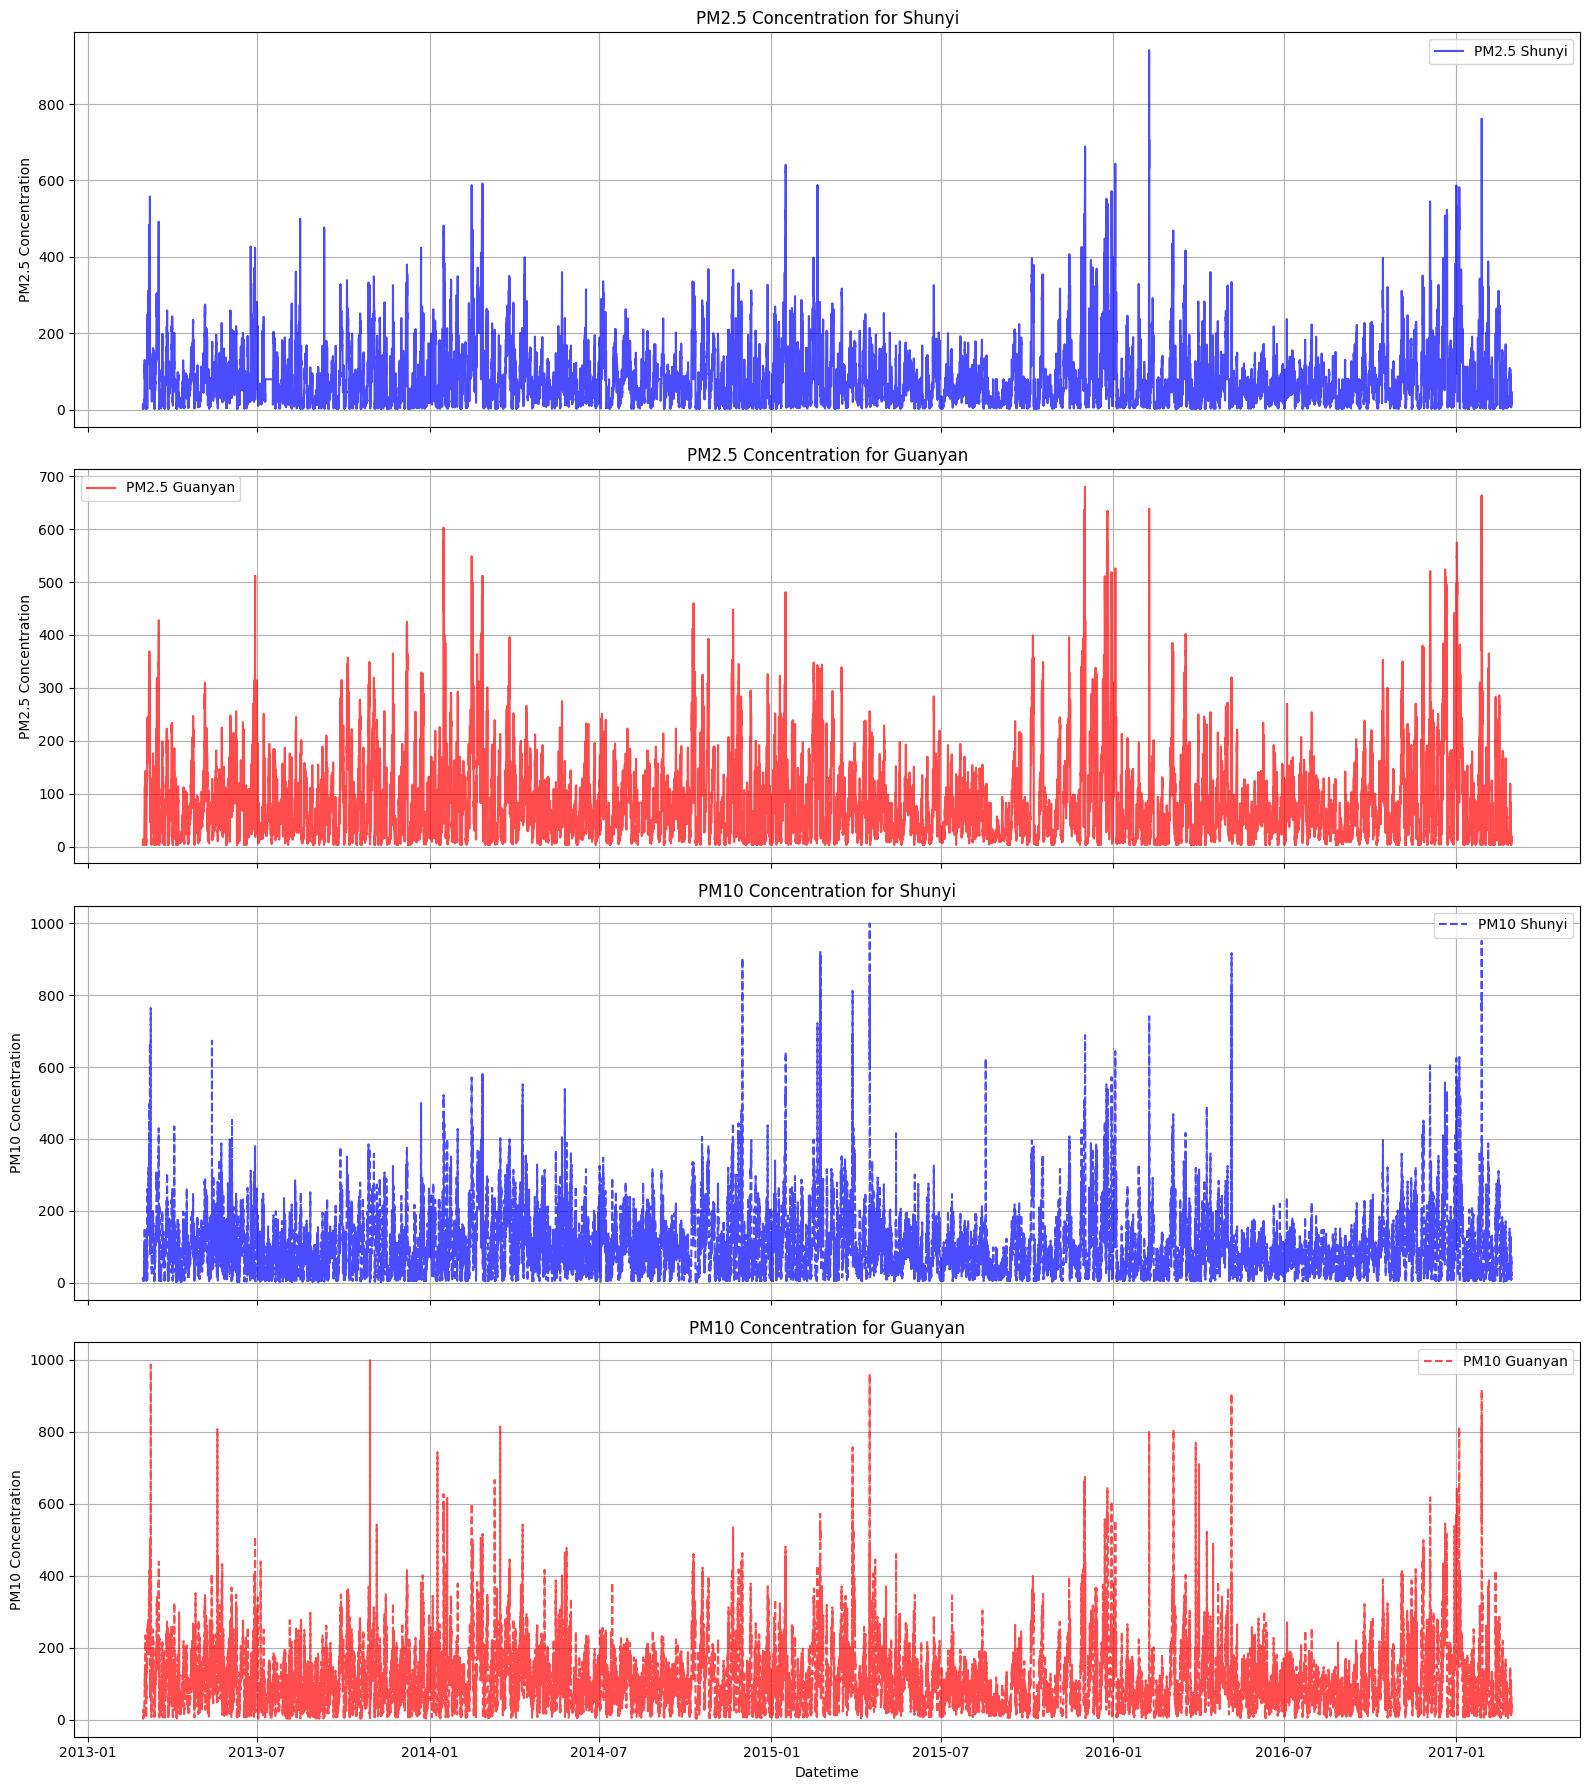

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 18), sharex=True)

axes[0].plot(merged_df.index, merged_df['PM2.5_shunyi'], label='PM2.5 Shunyi', color='blue', alpha=0.7)
axes[0].set_title('PM2.5 Concentration for Shunyi')
axes[0].set_ylabel('PM2.5 Concentration')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(merged_df.index, merged_df['PM2.5_guanyan'], label='PM2.5 Guanyan', color='red', alpha=0.7)
axes[1].set_title('PM2.5 Concentration for Guanyan')
axes[1].set_ylabel('PM2.5 Concentration')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(merged_df.index, merged_df['PM10_shunyi'], label='PM10 Shunyi', color='blue', linestyle='--', alpha=0.7)
axes[2].set_title('PM10 Concentration for Shunyi')
axes[2].set_ylabel('PM10 Concentration')
axes[2].legend()
axes[2].grid(True)

axes[3].plot(merged_df.index, merged_df['PM10_guanyan'], label='PM10 Guanyan', color='red', linestyle='--', alpha=0.7)
axes[3].set_title('PM10 Concentration for Guanyan')
axes[3].set_ylabel('PM10 Concentration')
axes[3].legend()
axes[3].grid(True)

plt.xlabel('Datetime')
plt.tight_layout()
plt.show()


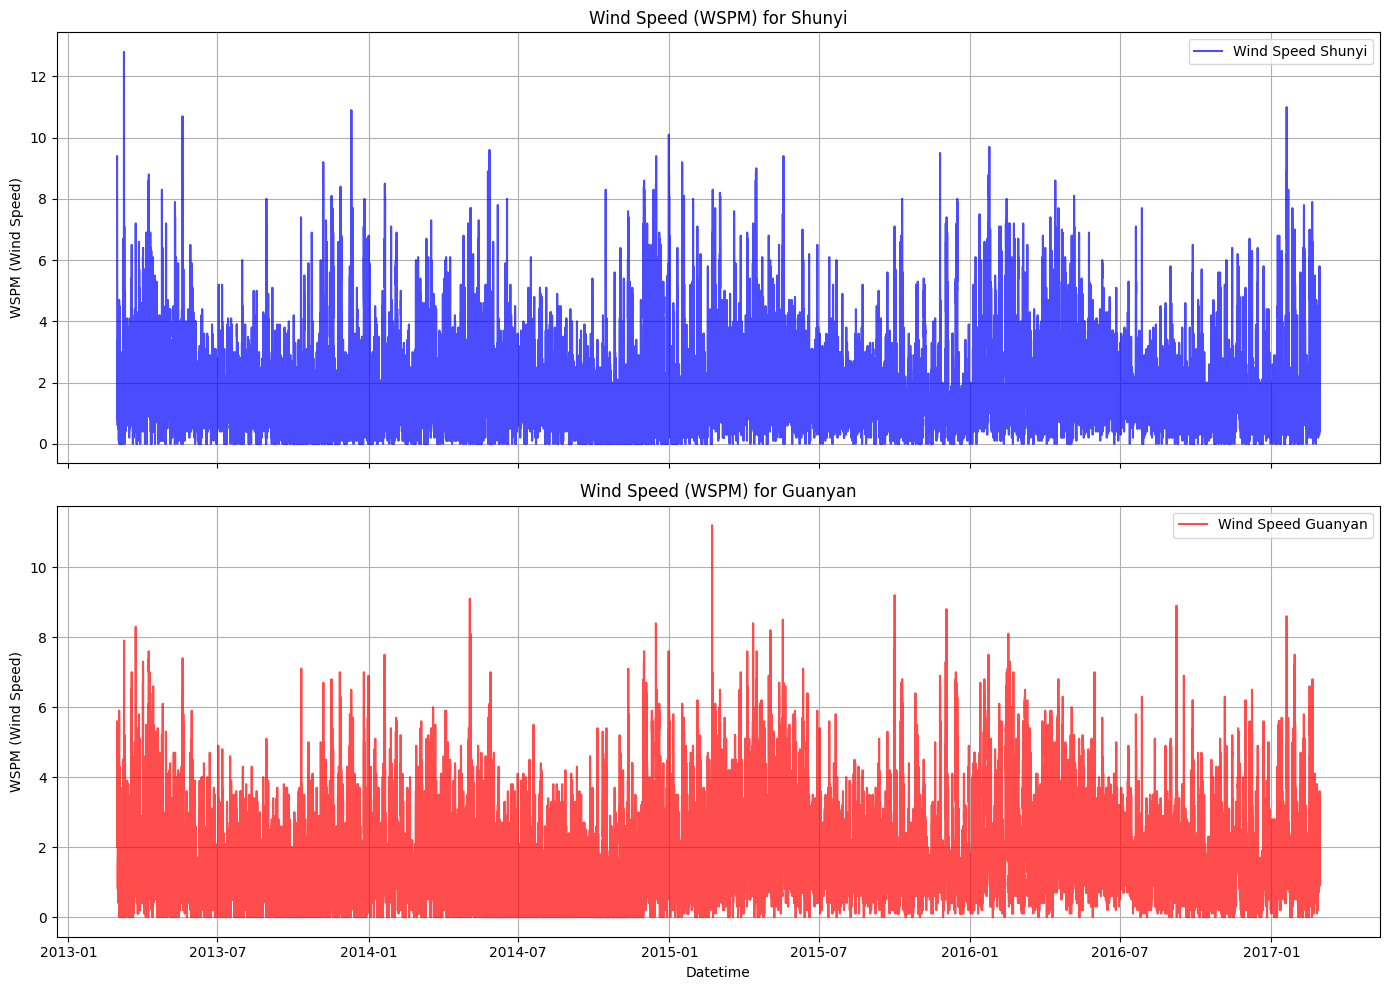

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

axes[0].plot(merged_df.index, merged_df['WSPM_shunyi'], label='Wind Speed Shunyi', color='blue', alpha=0.7)
axes[0].set_title('Wind Speed (WSPM) for Shunyi')
axes[0].set_ylabel('WSPM (Wind Speed)')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(merged_df.index, merged_df['WSPM_guanyan'], label='Wind Speed Guanyan', color='red', alpha=0.7)
axes[1].set_title('Wind Speed (WSPM) for Guanyan')
axes[1].set_xlabel('Datetime')
axes[1].set_ylabel('WSPM (Wind Speed)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


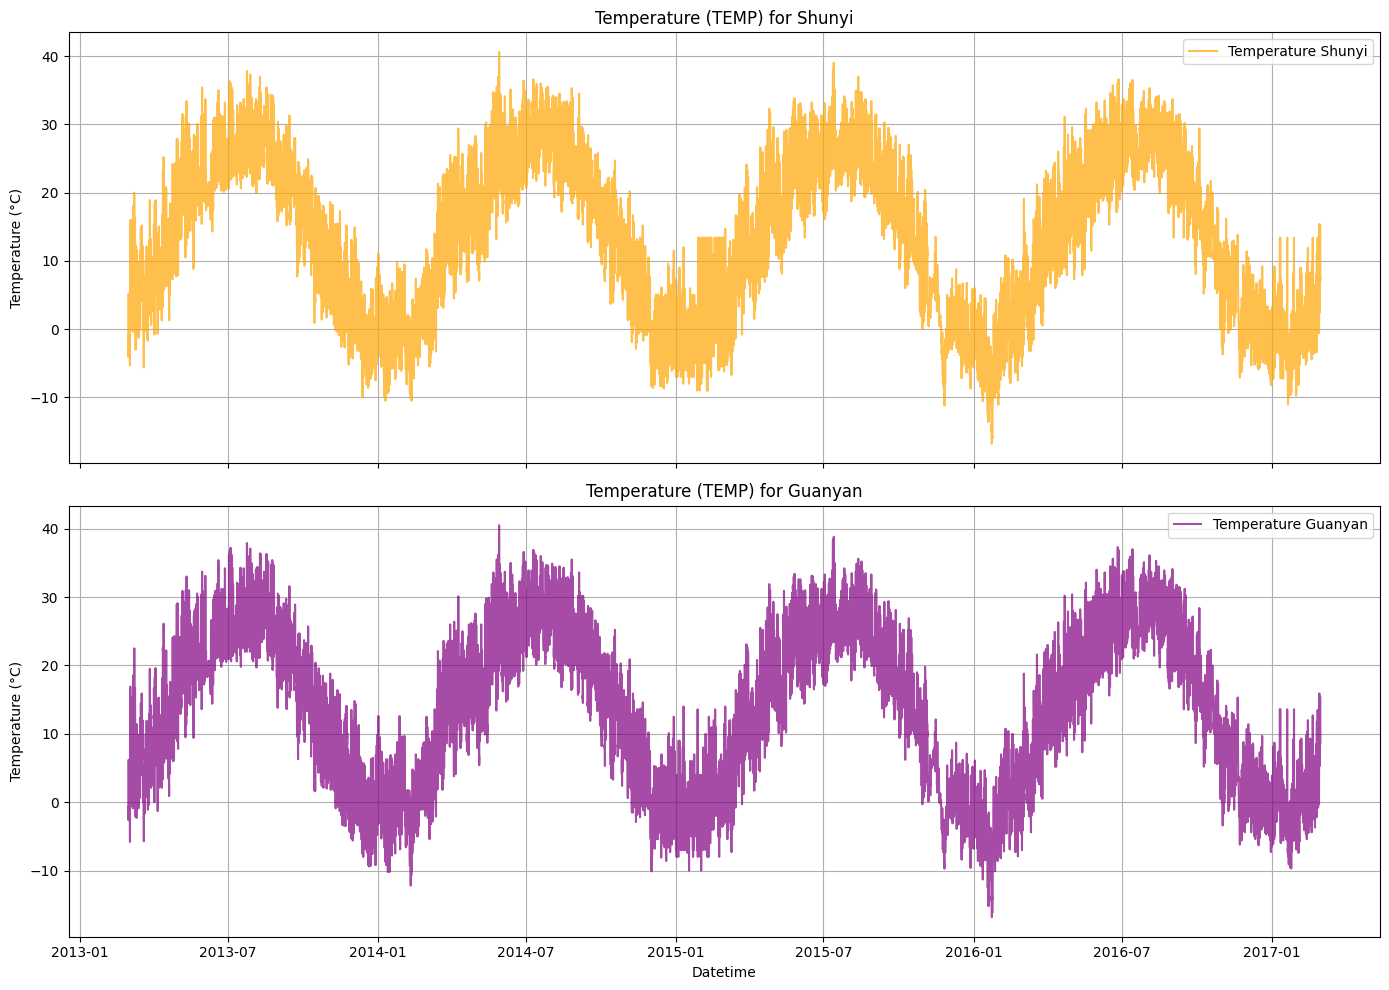

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

axes[0].plot(merged_df.index, merged_df['TEMP_shunyi'], label='Temperature Shunyi', color='orange', alpha=0.7)
axes[0].set_title('Temperature (TEMP) for Shunyi')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(merged_df.index, merged_df['TEMP_guanyan'], label='Temperature Guanyan', color='purple', alpha=0.7)
axes[1].set_title('Temperature (TEMP) for Guanyan')
axes[1].set_xlabel('Datetime')
axes[1].set_ylabel('Temperature (°C)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


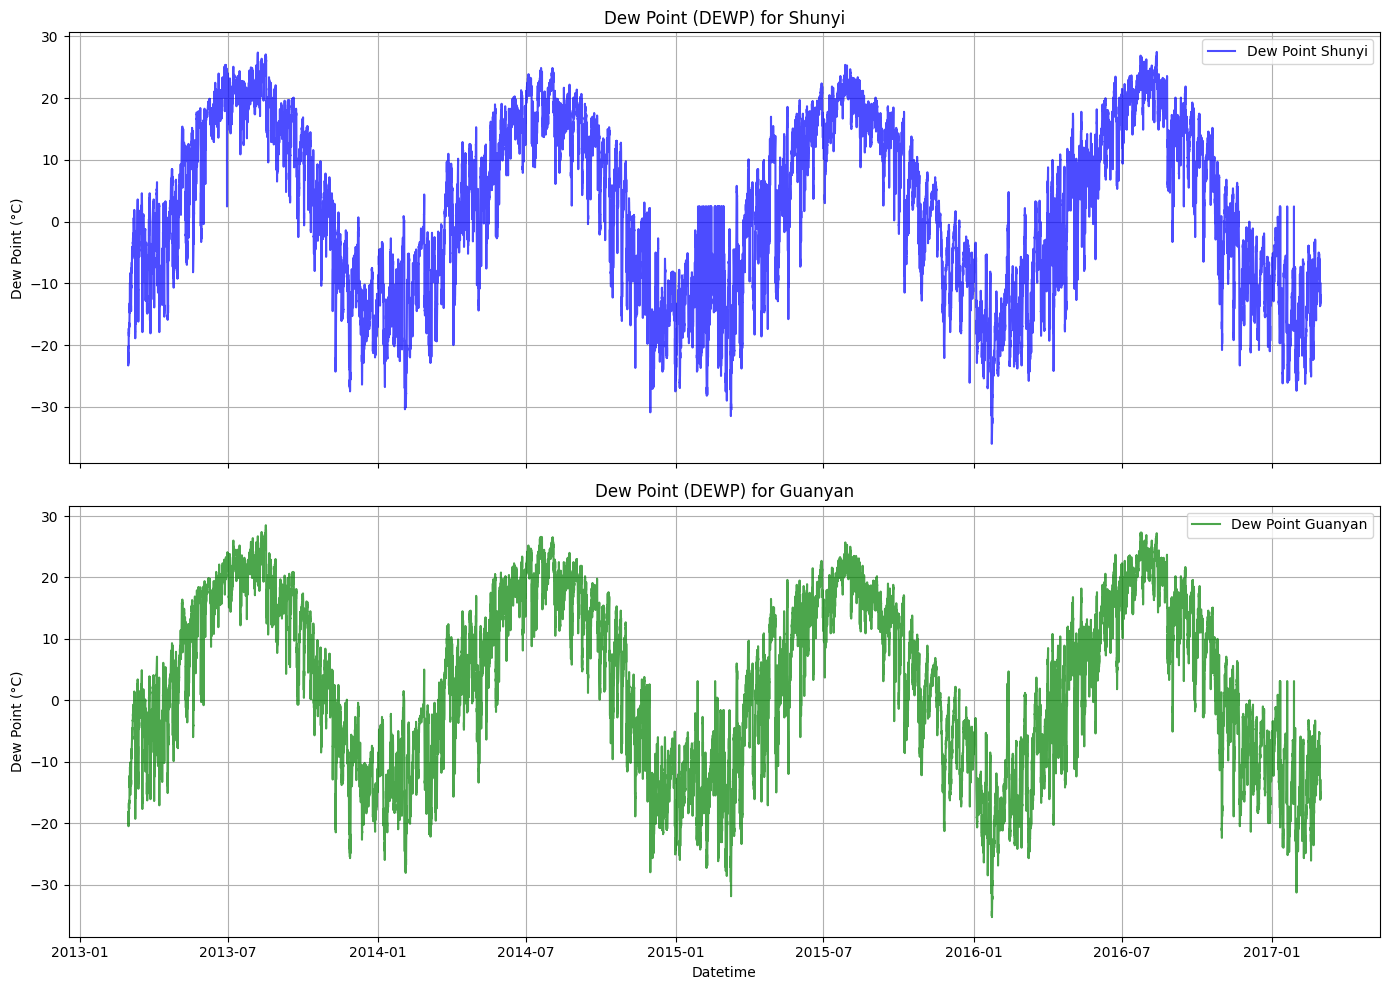

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

axes[0].plot(merged_df.index, merged_df['DEWP_shunyi'], label='Dew Point Shunyi', color='blue', alpha=0.7)
axes[0].set_title('Dew Point (DEWP) for Shunyi')
axes[0].set_ylabel('Dew Point (°C)')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(merged_df.index, merged_df['DEWP_guanyan'], label='Dew Point Guanyan', color='green', alpha=0.7)
axes[1].set_title('Dew Point (DEWP) for Guanyan')
axes[1].set_xlabel('Datetime')
axes[1].set_ylabel('Dew Point (°C)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


Visualisasi dataset untuk melihat pola

### Pertanyaan 1:

- Bagaimana cuaca (misalnya, suhu, kelembaban, curah hujan) berkorelasi dengan tingkat polutan pada distik shunyi dan guanyan?

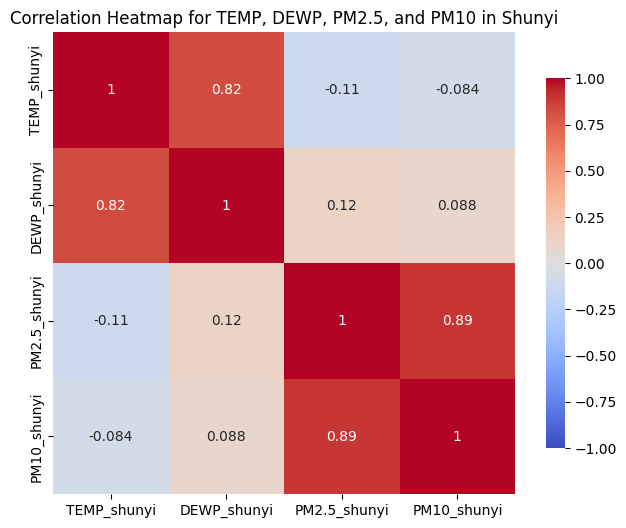

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_1_shunyi, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap for TEMP, DEWP, PM2.5, and PM10 in Shunyi')
plt.show()

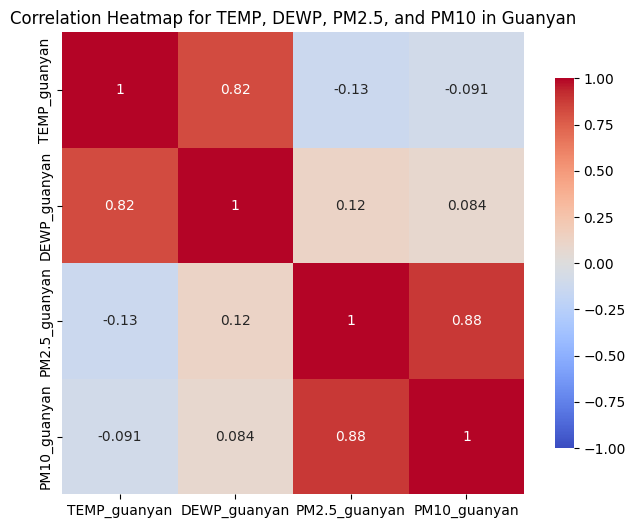

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_1_guanyan, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap for TEMP, DEWP, PM2.5, and PM10 in Guanyan')
plt.show()

Dari visualisasi diatas, kita dapat lihat bahwa cuaca, seperti suhu dan kelembapan, tidak memiliki pengaruh yang signifikan terhadap tingkat polutan di Shunyi dan Guanyan. Namun, ada hubungan yang sangat kuat antara konsentrasi PM2.5 dan PM10, yang menunjukkan bahwa kedua polutan ini biasanya terjadi bersamaan.

### Pertanyaan 2:

- Apakah kecepatan angin dapat mengurangi tingkat polutan pada distrik shunyi dan guanyan?

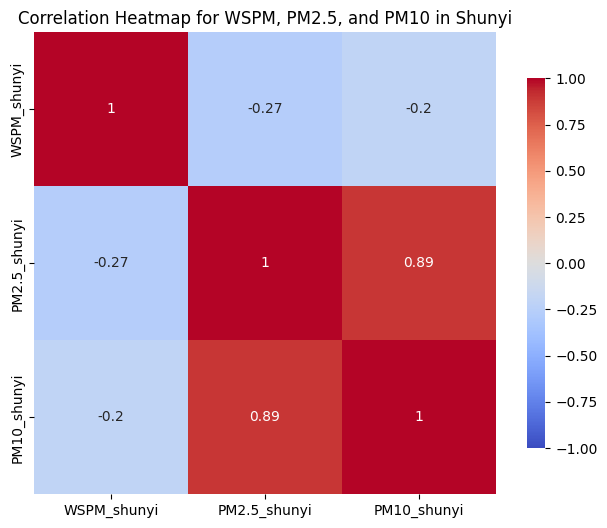

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_2_shunyi, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap for WSPM, PM2.5, and PM10 in Shunyi')
plt.show()

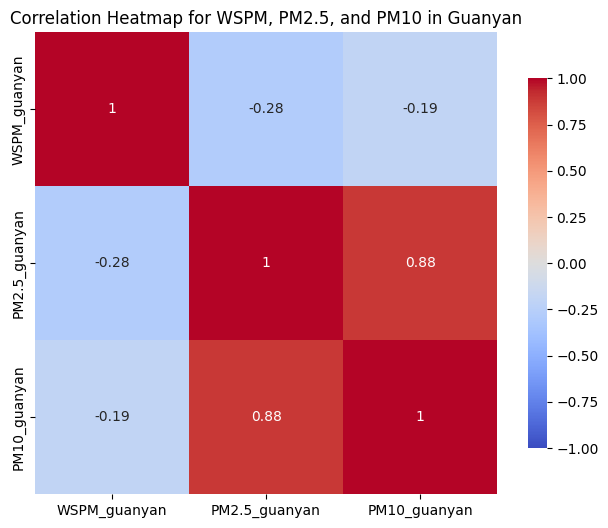

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_2_guanyan, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap for WSPM, PM2.5, and PM10 in Guanyan')
plt.show()

Berdasarkan kedua heatmap di atas untuk distrik Shunyi dan Guanyan, terlihat bahwa kecepatan angin (WSPM) memiliki korelasi negatif yang lemah dengan tingkat polutan PM2.5 dan PM10 di kedua distrik. Korelasi negatif ini menunjukkan bahwa peningkatan kecepatan angin cenderung berkaitan dengan penurunan konsentrasi polutan, meskipun hubungan ini relatif lemah. Artinya, kecepatan angin mungkin memiliki sedikit efek dalam membantu mengurangi tingkat polutan, tetapi faktor ini tidak dominan atau memiliki dampak yang signifikan dalam penurunan konsentrasi polusi di udara.

## Clustering Binning Technique

In [31]:
pm2_5_bins_shunyi = [
    merged_df['PM2.5_shunyi'].min(),
    merged_df['PM2.5_shunyi'].quantile(0.25),
    merged_df['PM2.5_shunyi'].quantile(0.5),
    merged_df['PM2.5_shunyi'].quantile(0.75),
    merged_df['PM2.5_shunyi'].max()
]

pm10_bins_shunyi = [
    merged_df['PM10_shunyi'].min(),
    merged_df['PM10_shunyi'].quantile(0.25),
    merged_df['PM10_shunyi'].quantile(0.5),
    merged_df['PM10_shunyi'].quantile(0.75),
    merged_df['PM10_shunyi'].max()
]

pm2_5_bins_guanyan = [
    merged_df['PM2.5_guanyan'].min(),
    merged_df['PM2.5_guanyan'].quantile(0.25),
    merged_df['PM2.5_guanyan'].quantile(0.5),
    merged_df['PM2.5_guanyan'].quantile(0.75),
    merged_df['PM2.5_guanyan'].max()
]

pm10_bins_guanyan = [
    merged_df['PM10_guanyan'].min(),
    merged_df['PM10_guanyan'].quantile(0.25),
    merged_df['PM10_guanyan'].quantile(0.5),
    merged_df['PM10_guanyan'].quantile(0.75),
    merged_df['PM10_guanyan'].max()
]

labels = ['Low', 'Medium', 'High', 'Very High']

merged_df['PM2.5_Percentile_Category_shunyi'] = pd.cut(merged_df['PM2.5_shunyi'], bins=pm2_5_bins_shunyi, labels=labels, include_lowest=True)
merged_df['PM10_Percentile_Category_shunyi'] = pd.cut(merged_df['PM10_shunyi'], bins=pm10_bins_shunyi, labels=labels, include_lowest=True)

merged_df['PM2.5_Percentile_Category_guanyan'] = pd.cut(merged_df['PM2.5_guanyan'], bins=pm2_5_bins_guanyan, labels=labels, include_lowest=True)
merged_df['PM10_Percentile_Category_guanyan'] = pd.cut(merged_df['PM10_guanyan'], bins=pm10_bins_guanyan, labels=labels, include_lowest=True)

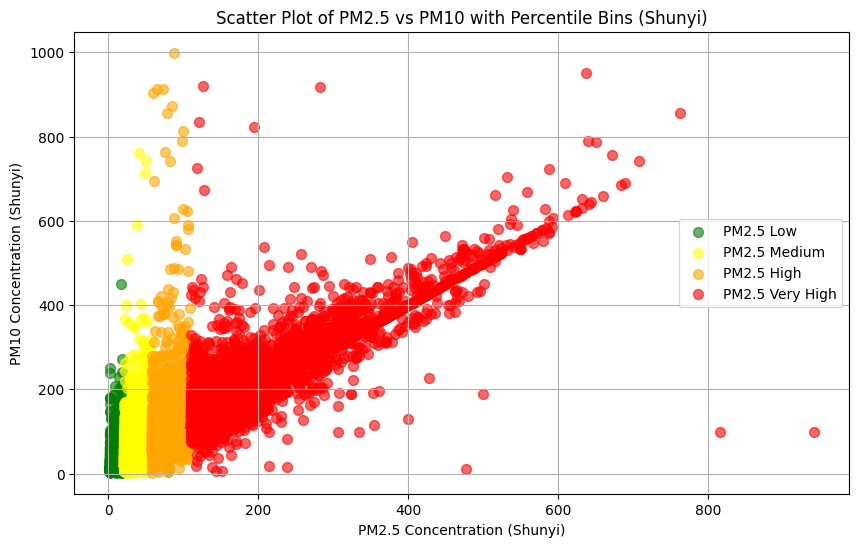

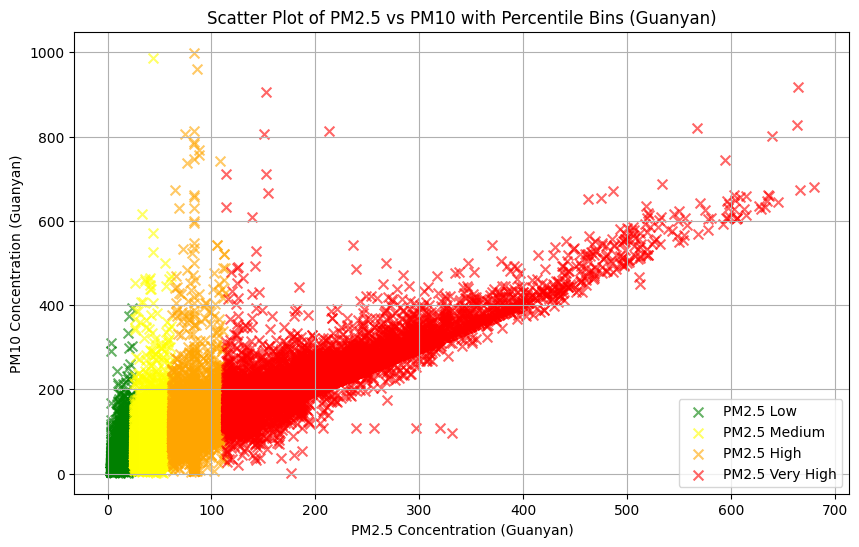

In [32]:
color_map = {
    'Low': 'green',
    'Medium': 'yellow',
    'High': 'orange',
    'Very High': 'red'
}

plt.figure(figsize=(10, 6))
for category, color in color_map.items():
    subset_shunyi = merged_df[merged_df['PM2.5_Percentile_Category_shunyi'] == category]
    plt.scatter(subset_shunyi['PM2.5_shunyi'], subset_shunyi['PM10_shunyi'],
                label=f'PM2.5 {category}', color=color, s=50, alpha=0.6, marker='o')

plt.xlabel('PM2.5 Concentration (Shunyi)')
plt.ylabel('PM10 Concentration (Shunyi)')
plt.title('Scatter Plot of PM2.5 vs PM10 with Percentile Bins (Shunyi)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for category, color in color_map.items():
    subset_guanyan = merged_df[merged_df['PM2.5_Percentile_Category_guanyan'] == category]
    plt.scatter(subset_guanyan['PM2.5_guanyan'], subset_guanyan['PM10_guanyan'],
                label=f'PM2.5 {category}', color=color, s=50, alpha=0.6, marker='x')

plt.xlabel('PM2.5 Concentration (Guanyan)')
plt.ylabel('PM10 Concentration (Guanyan)')
plt.title('Scatter Plot of PM2.5 vs PM10 with Percentile Bins (Guanyan)')
plt.legend()
plt.grid(True)
plt.show()


Pada analisis clustering ini mencakup perhitungan nilai persentil (minimum, 25%, 50%, 75%, dan maksimum) untuk setiap variabel di kedua distrik, yang kemudian digunakan untuk menetapkan empat kategori kualitas udara: Low, Medium, High, dan Very High. Dengan bantuan fungsi pd.cut() dari Pandas, setiap pengukuran diklasifikasikan ke dalam kategori sesuai rentang persentilnya. Hasil clustering ini menampilkan data dalam kategori kualitas udara yang memungkinkan analisis visual distribusi tingkat polusi di kedua distrik, serta mempermudah identifikasi risiko kesehatan berdasarkan tingkat kualitas udara.

## Conclusion

- Conclution pertanyaan 1: Cuaca, seperti suhu dan kelembapan, tidak memiliki pengaruh yang signifikan terhadap tingkat polutan di Shunyi dan Guanyan. Namun, ada hubungan yang sangat kuat antara konsentrasi PM2.5 dan PM10, yang menunjukkan bahwa kedua polutan ini biasanya terjadi bersamaan.
- Conclution pertanyaan 2: Kecepatan angin (WSPM) memiliki korelasi negatif yang lemah dengan tingkat polutan PM2.5 dan PM10 di kedua distrik. Korelasi negatif ini menunjukkan bahwa peningkatan kecepatan angin cenderung berkaitan dengan penurunan konsentrasi polutan, meskipun hubungan ini relatif lemah. Artinya, kecepatan angin mungkin memiliki sedikit efek dalam membantu mengurangi tingkat polutan, tetapi faktor ini tidak dominan atau memiliki dampak yang signifikan dalam penurunan konsentrasi polusi di udara.

In [33]:
merged_df.to_csv('main_data.csv', index=False)